<a href="https://colab.research.google.com/github/J0hnV1ct0r/Rpad/blob/main/Regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.animation as animation
import numpy as np

In [4]:
dados=pd.read_csv('dados/artificial1d.csv',header=None)
dados = dados.rename(columns={dados.columns[0]: 'x', dados.columns[1]: 'y'})
dados

,x,y
0,-1.000000,-2.082017
1,-0.931034,-1.326980
2,-0.862069,-1.105598
3,-0.793103,-0.873946
4,-0.724138,-0.285027
5,-0.655172,-0.431153
6,-0.586207,-0.794754
7,-0.517241,-0.886068
8,-0.448276,-0.899900
9,-0.379310,-0.861844


# Modelo

In [ ]:
class LinearRegression:
  def __init__(self,opt='SGD'):
    self.w1=0.0
    self.w0=0.0
    self.w =[]
    self.opt=opt
    self.losses=[]
    self.w1_hist=[]
    self.w0_hist=[]

  def fit(self, X, y, lr=0.001, epochs=100):

    if self.opt=='SGD':
      self.fit_SGD(X, y, lr, epochs)

    elif self.opt=='GD':
      self.fit_GD(X, y, lr, epochs)

    elif self.opt=='OLS':
      self.fit_OLS(X, y)
    else:
      print('otimizador não encontrado')

  def fit_SGD(self, X, y, lr=0.001, epochs=100):
    for i in range(epochs):
      errors=[]
      indices = list(range(len(X)))
      random.shuffle(indices)

      for sample in indices:
        #Calculo dos erros
        y_pred=self.w1*X[sample]+self.w0
        error=y[sample]-y_pred
        errors.append(error)

        #ajuste dos Ws
        self.w0=self.w0+lr*error
        self.w1=self.w1+lr*error*X[sample]

        #Salvamento do historico de Ws
        self.w1_hist.append(self.w1)
        self.w0_hist.append(self.w0)

      #Calculo da loss
      loss=self.loss_function(errors)
      self.losses.append(loss)

  def fit_GD(self, X, y, lr=0.001, epochs=100):
    for i in range(epochs):
      errors=[]

      #Calculo dos erros
      for sample in range(len(X)):
        y_pred=self.w1*X[sample]+self.w0
        error=y[sample]-y_pred
        errors.append(error)

      #ajuste dos Ws
      self.w0=self.w0+lr*(sum(errors)/len(X))
      self.w1=self.w1+lr*(sum([errors[sample]*X[sample] for sample in range(len(X))])/len(X))

      #Salvamento do historico de Ws
      self.w1_hist.append(self.w1)
      self.w0_hist.append(self.w0)

      #Calculo da loss
      loss=self.loss_function(errors)
      self.losses.append(loss)


  def fit_OLS(self, X, y):
     X = X.to_numpy()  #Converte X para um array numpy
     X = X.reshape(-1, 1)  #Da reshape no X para garantir que é 2D
     X_b = np.c_[np.ones((X.shape[0], 1)), X]  #Adiciona a coluna de bias
     y = y.to_numpy()  #Converte y em um array numpy
     w = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
     print(w)
     self.w0 = w[0]  # Acessa o primeiro elemento de w para obter W0
     self.w1 = w[1]  # Acessa o segundo elemento de w para obter W1

  def loss_function(self, errors):

    loss = sum([error**2 for error in errors])/(2*len(errors))# Calcula a perda e salva na lista
    return loss

  def predict(self, X):
    y_pred=[]# Lista para salvar as predições
    for sample in X:
      y_pred.append(self.w1*sample+self.w0)# Calcula a predição e salva na lista
    return y_pred

# Teste do modelo

In [ ]:
# Separa um grupo de treino e teste
train, test = train_test_split(dados, test_size=0.2)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

##  Modelo com otimizador GD

In [ ]:
# Instancia o modelo com o GD como otimizador
lr_gd = LinearRegression(opt='GD')

In [ ]:
lr=0.1# Passo de aprendizado
epochs=200# Numero de epocas
lr_gd.fit(train['x'], train['y'],lr,epochs)# Chamada do treinamento 

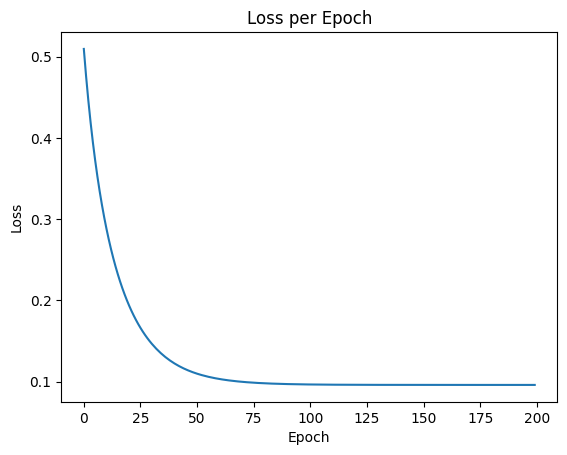

In [ ]:
# Grafico de perdas por epocas para o otimizador GD
plt.plot(range(len(lr_gd.losses)), lr_gd.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

In [ ]:
# teste do treinamento
y_pred = lr_gd.predict(test['x'])
test['y_pred_gd'] = y_pred
test

,x,y,y_pred_gd
0,-0.103448,-0.452023,0.003066
1,-1.000000,-2.082017,-1.357749
2,0.793103,0.823322,1.363882
3,-0.862069,-1.105598,-1.148393
4,-0.241379,-1.235951,-0.206290
5,-0.586207,-0.794754,-0.729680


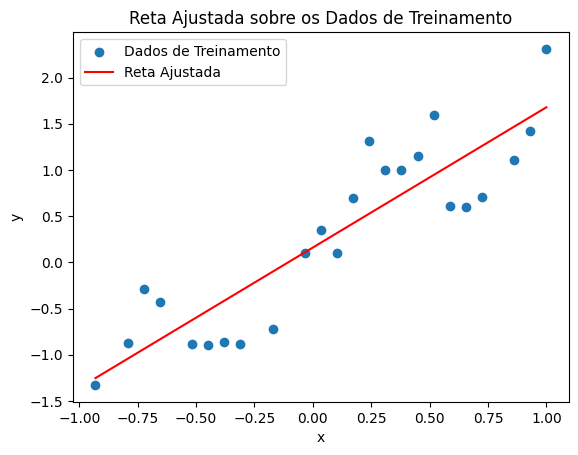

In [68]:
# Gerar pontos para a reta ajustada (usando intervalo de x do conjunto de treinamento)
x_reta = np.linspace(train['x'].min(), train['x'].max(), 100)
y_reta = lr_gd.w0 + lr_gd.w1 * x_reta

# Plotar os dados de treinamento e a reta ajustada
plt.scatter(train['x'], train['y'], label='Dados de Treinamento')  # Plotar apenas dados de treinamento
plt.plot(x_reta, y_reta, color='red', label='Reta Ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reta Ajustada sobre os Dados de Treinamento')
plt.legend()
plt.show()

In [88]:
#Cria e salva uma serie de graficos com o historico de w0 e w1 para montar o gif
for i in range(len(lr_gd.w0_hist)):
    x_reta = np.linspace(train['x'].min(), train['x'].max(), 100)
    y_reta = lr_gd.w0_hist[i] + lr_gd.w1_hist[i] * x_reta

    # Plotar os dados de treinamento e a reta ajustada
    plt.scatter(train['x'], train['y'], label='Dados de Treinamento')  # Plotar apenas dados de treinamento
    plt.plot(x_reta, y_reta, color='red', label='Reta Ajustada')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Ajuste da reta sobre os Dados de Treinamento para o GD')
    plt.legend()
    plt.savefig(f'graficos/gd/grafico{i}.png')
    plt.clf()
    

<Figure size 640x480 with 0 Axes>

## Modelo com otimizador sdg

In [ ]:
# Instancia o modelo com o SDG como otimizador
lr_sgd = LinearRegression(opt='SGD')

In [ ]:
lr=0.1# Passo de aprendizagem
epochs=200# Numero de epocas
lr_sgd.fit(train['x'], train['y'],lr,epochs)# Chamada do treinamento

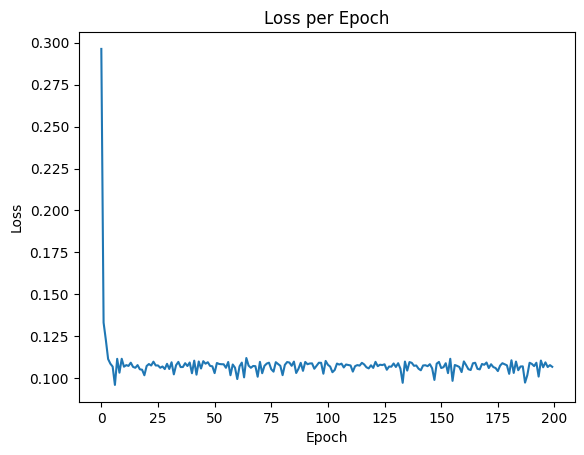

In [ ]:
# Grafico de perdas por epocas para o otimizador SDG
plt.plot(range(len(lr_sgd.losses)), lr_sgd.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

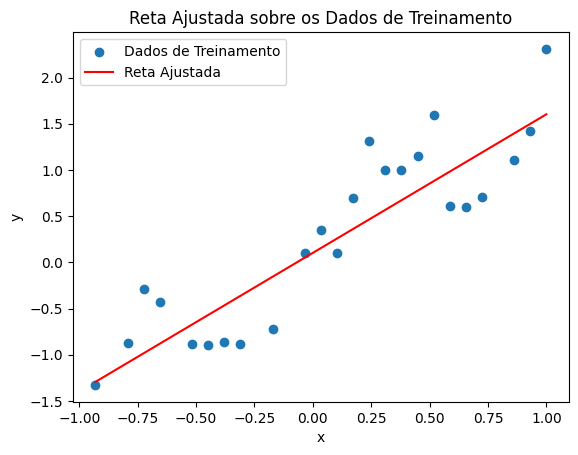

In [73]:
# Gerar pontos para a reta ajustada (usando intervalo de x do conjunto de treinamento)
x_reta = np.linspace(train['x'].min(), train['x'].max(), 100)
y_reta = lr_sgd.w0 + lr_sgd.w1 * x_reta

# Plotar os dados de treinamento e a reta ajustada
plt.scatter(train['x'], train['y'], label='Dados de Treinamento')  # Plotar apenas dados de treinamento
plt.plot(x_reta, y_reta, color='red', label='Reta Ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reta Ajustada sobre os Dados de Treinamento')
plt.legend()
plt.show()

In [ ]:
# Teste do treinamento
y_pred = lr_sgd.predict(test['x'])
test['y_pred_sgd'] = y_pred
test

,x,y,y_pred_gd,y_pred_sgd
0,-0.103448,-0.452023,0.003066,-0.052701
1,-1.000000,-2.082017,-1.357749,-1.397398
2,0.793103,0.823322,1.363882,1.291996
3,-0.862069,-1.105598,-1.148393,-1.190522
4,-0.241379,-1.235951,-0.206290,-0.259577
5,-0.586207,-0.794754,-0.729680,-0.776769


In [89]:
#Cria e salva uma serie de graficos com o historico de w0 e w1 para montar o gif
for i in range(len(lr_sgd.w0_hist)):
    x_reta = np.linspace(train['x'].min(), train['x'].max(), 100)
    y_reta = lr_sgd.w0_hist[i] + lr_sgd.w1_hist[i] * x_reta

    # Plotar os dados de treinamento e a reta ajustada
    plt.scatter(train['x'], train['y'], label='Dados de Treinamento')  # Plotar apenas dados de treinamento
    plt.plot(x_reta, y_reta, color='red', label='Reta Ajustada')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Ajuste da reta sobre os Dados de Treinamento Para o SDG')
    plt.legend()
    plt.savefig(f'graficos/sgd/grafico{i}.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

## Modelo com otimizador OLS

In [ ]:
# Instancia o modelo com o OLS como otimizador 
lr_ols = LinearRegression(opt='OLS')

In [ ]:
lr_ols.fit(train['x'], train['y'])# Chamada do treinamento

[0.15980802 1.52008304]


In [ ]:
# Exemplo de W0
lr_ols.w0

0.1598080169811403

In [ ]:
# Exemplo de W1
lr_ols.w1

1.5200830385116246

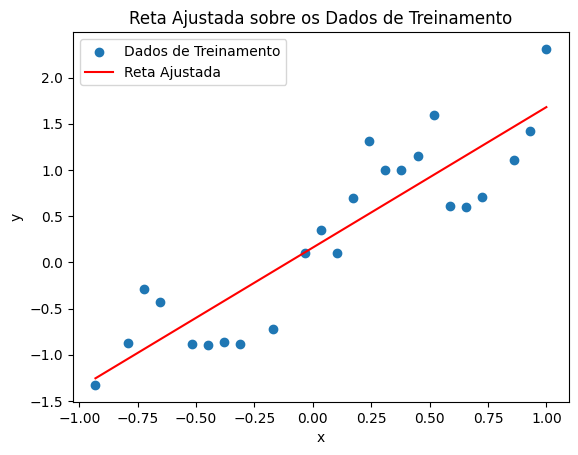

In [79]:
# Gerar pontos para a reta ajustada (usando intervalo de x do conjunto de treinamento)
x_reta = np.linspace(train['x'].min(), train['x'].max(), 100)
y_reta = lr_ols.w0 + lr_ols.w1 * x_reta

# Plotar os dados de treinamento e a reta ajustada
plt.scatter(train['x'], train['y'], label='Dados de Treinamento')  # Plotar apenas dados de treinamento
plt.plot(x_reta, y_reta, color='red', label='Reta Ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reta Ajustada sobre os Dados de Treinamento')
plt.legend()
plt.show()

In [ ]:
# Teste do treinamento
y_pred = lr_ols.predict(test['x'])
test['y_pred_ols'] = y_pred
test

,x,y,y_pred_gd,y_pred_sgd,y_pred_ols
0,-0.103448,-0.452023,0.003066,-0.052701,0.002558
1,-1.000000,-2.082017,-1.357749,-1.397398,-1.360275
2,0.793103,0.823322,1.363882,1.291996,1.365391
3,-0.862069,-1.105598,-1.148393,-1.190522,-1.150608
4,-0.241379,-1.235951,-0.206290,-0.259577,-0.207109
5,-0.586207,-0.794754,-0.729680,-0.776769,-0.731275
